In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import LocalOutlierFactor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from numpy import set_printoptions

# Reading the file

In [2]:
churn = pd.read_csv('C:/Users/AJ/Documents/Workspace/Churn_Train.csv')
churn.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,NV,125.0,area_code_510,no,no,0.0,2013.4,99.0,28.66,1107.6,107.0,14.93,243.3,92,10.95,10.9,7.0,2.94,0.0,no
1,HI,108.0,area_code_415,no,no,0.0,291.6,99.0,49.57,221.1,93.0,18.79,229.2,110,10.31,14.0,9.0,3.78,2.0,yes
2,DC,82.0,area_code_415,no,no,0.0,300.3,109.0,51.05,181.0,100.0,15.39,270.1,73,12.15,11.7,4.0,3.16,0.0,yes
3,HI,NaN,area_code_408,no,yes,30.0,110.3,71.0,18.75,182.4,108.0,15.50,183.8,88,8.27,11.0,8.0,2.97,2.0,no
4,OH,83.0,area_code_415,no,no,0.0,337.4,120.0,57.36,227.4,116.0,19.33,153.9,114,6.93,15.8,7.0,4.27,0.0,yes


In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3333 non-null   object 
 1   account_length                 2832 non-null   float64
 2   area_code                      3333 non-null   object 
 3   international_plan             3333 non-null   object 
 4   voice_mail_plan                3333 non-null   object 
 5   number_vmail_messages          3133 non-null   float64
 6   total_day_minutes              3133 non-null   float64
 7   total_day_calls                3133 non-null   float64
 8   total_day_charge               3133 non-null   float64
 9   total_eve_minutes              3032 non-null   float64
 10  total_eve_calls                3133 non-null   float64
 11  total_eve_charge               3133 non-null   float64
 12  total_night_minutes            3133 non-null   f

# Data Treatment

Converting categorical variables to numerical variables in preparation for modeling

In [4]:
# for area_code column
area1 = churn[churn['area_code']=='area_code_510']
area1.loc[:, 'area_code'] = 510

area2 = churn[churn['area_code']=='area_code_415']
area2.loc[:, 'area_code'] = 415

area3 = churn[churn['area_code']=='area_code_408']
area3.loc[:, 'area_code'] = 408

nChurn1= pd.concat([area1, area2, area3])

# for international_plan column
interN = nChurn1[nChurn1['international_plan']=='no']
interN.loc[:, 'international_plan'] = 0

interY = nChurn1[nChurn1['international_plan']=='yes']
interY.loc[:, 'international_plan'] = 1

nChurn2= pd.concat([interN, interY])

# for voice_mail_plan column
voiceN = nChurn2[nChurn2['voice_mail_plan']=='no']
voiceN.loc[:, 'voice_mail_plan'] = 0

voiceY = nChurn2[nChurn2['voice_mail_plan']=='yes']
voiceY.loc[:, 'voice_mail_plan'] = 1

nChurn3= pd.concat([voiceN, voiceY])

# for churn column
churnN = nChurn3[nChurn3['churn']=='no']
churnN.loc[:, 'churn'] = 0

churnY = nChurn3[nChurn3['churn']=='yes']
churnY.loc[:, 'churn'] = 1

nChurn4= pd.concat([churnN, churnY])

nChurn4.head(10)    

C:\Users\AJ\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,NV,125.0,510,0,0,0.0,2013.4,99.0,28.66,1107.6,107.0,14.93,243.3,92,10.95,10.9,7.0,2.94,0.0,0
13,ID,NaN,510,0,0,0.0,150.9,79.0,25.65,161.8,87.0,13.75,167.7,115,7.55,11.7,5.0,3.16,3.0,0
16,NY,65.0,510,0,0,0.0,195.4,110.0,33.22,181.2,109.0,15.40,178.5,105,8.03,8.9,4.0,2.40,0.0,0
27,FL,113.0,510,0,0,0.0,92.6,85.0,15.74,177.6,92.0,15.10,159.8,72,7.19,14.4,4.0,3.89,3.0,0
28,MD,73.0,510,0,0,0.0,254.7,80.0,43.30,90.2,79.0,7.67,153.4,60,6.90,10.6,8.0,2.86,0.0,0
35,NV,22.0,510,0,0,0.0,160.4,108.0,27.27,218.1,88.0,18.54,192.9,115,8.68,12.5,4.0,3.38,1.0,0
52,AK,52.0,510,0,0,0.0,148.3,83.0,25.21,181.6,79.0,15.44,155.6,104,7.00,8.3,6.0,2.24,3.0,0
57,SD,137.0,510,0,0,0.0,242.1,118.0,41.16,191.0,93.0,16.24,218.6,50,9.84,14.7,2.0,3.97,3.0,0
64,UT,164.0,510,0,0,0.0,192.1,95.0,32.66,249.8,94.0,21.23,132.6,100,5.97,7.3,3.0,1.97,3.0,0
70,NH,139.0,510,0,0,-8.0,221.3,140.0,37.62,157.8,89.0,13.41,192.5,89,8.66,11.3,6.0,3.05,1.0,0


Histogram chart to show the distribution of each feature

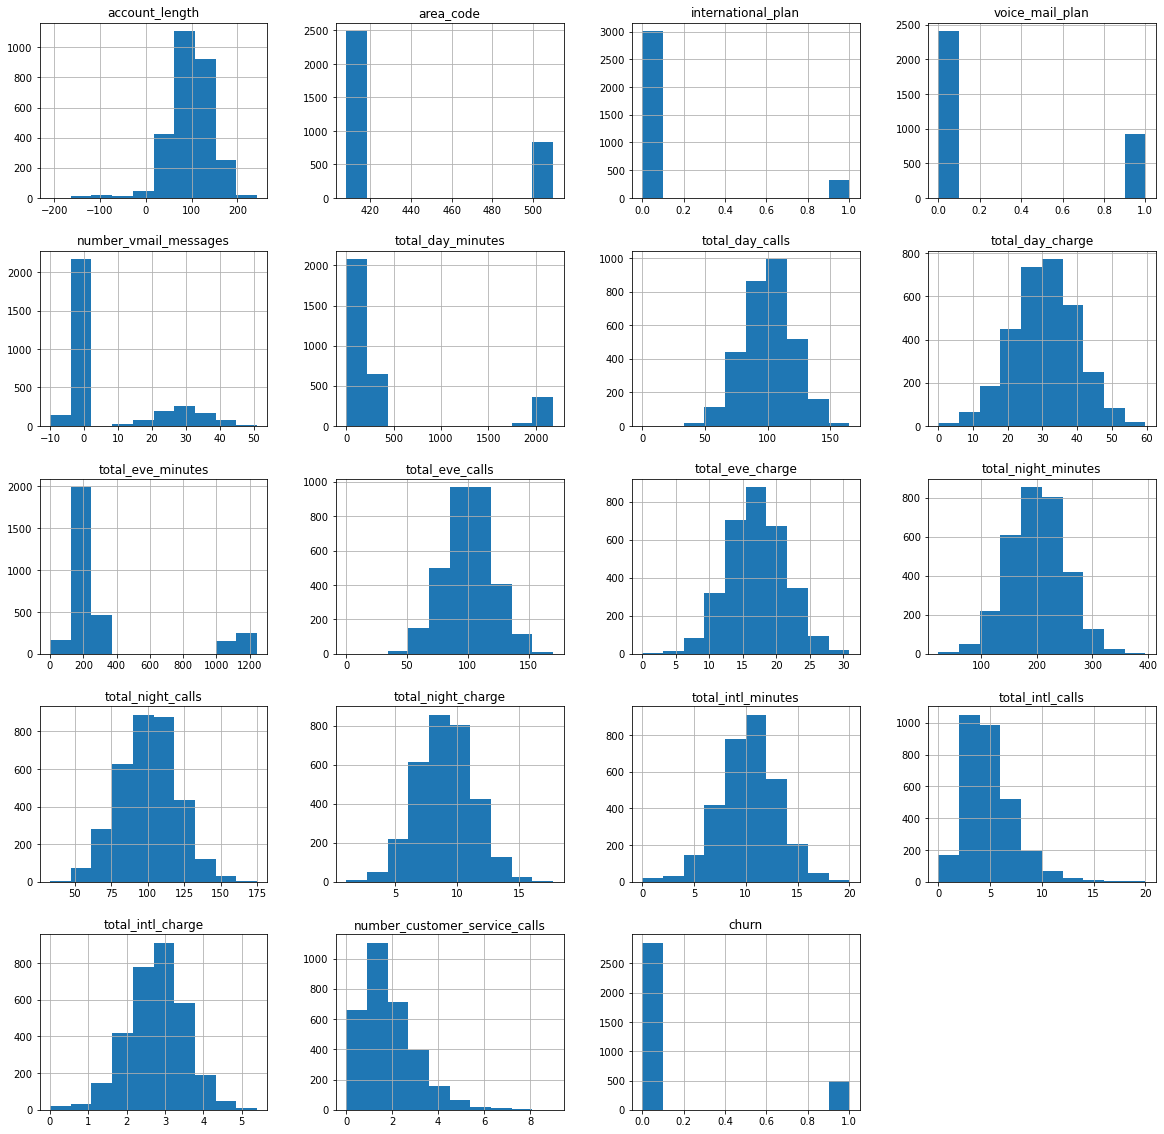

In [5]:
nChurn4.hist()
plt.gcf().set_size_inches(20,20)
plt.show()

Treating for missing values

In [6]:
# treating for missing using interpolation
churnF = nChurn4.interpolate(method='linear', limit_direction='forward')
churnF.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,NV,125.0,510,0,0,0.0,2013.4,99.0,28.66,1107.6,107.0,14.93,243.3,92,10.95,10.9,7.0,2.94,0.0,0
13,ID,95.0,510,0,0,0.0,150.9,79.0,25.65,161.8,87.0,13.75,167.7,115,7.55,11.7,5.0,3.16,3.0,0
16,NY,65.0,510,0,0,0.0,195.4,110.0,33.22,181.2,109.0,15.40,178.5,105,8.03,8.9,4.0,2.40,0.0,0
27,FL,113.0,510,0,0,0.0,92.6,85.0,15.74,177.6,92.0,15.10,159.8,72,7.19,14.4,4.0,3.89,3.0,0
28,MD,73.0,510,0,0,0.0,254.7,80.0,43.30,90.2,79.0,7.67,153.4,60,6.90,10.6,8.0,2.86,0.0,0
35,NV,22.0,510,0,0,0.0,160.4,108.0,27.27,218.1,88.0,18.54,192.9,115,8.68,12.5,4.0,3.38,1.0,0
52,AK,52.0,510,0,0,0.0,148.3,83.0,25.21,181.6,79.0,15.44,155.6,104,7.00,8.3,6.0,2.24,3.0,0
57,SD,137.0,510,0,0,0.0,242.1,118.0,41.16,191.0,93.0,16.24,218.6,50,9.84,14.7,2.0,3.97,3.0,0
64,UT,164.0,510,0,0,0.0,192.1,95.0,32.66,249.8,94.0,21.23,132.6,100,5.97,7.3,3.0,1.97,3.0,0
70,NH,139.0,510,0,0,-8.0,221.3,140.0,37.62,157.8,89.0,13.41,192.5,89,8.66,11.3,6.0,3.05,1.0,0


Extracting the columns to use for feature selecting

In [7]:
sChurn = churnF.loc[:, ['account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn']]
sChurn.head(10)

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,125.0,510,0,0,0.0,2013.4,99.0,28.66,1107.6,107.0,14.93,243.3,92,10.95,10.9,7.0,2.94,0.0,0
13,95.0,510,0,0,0.0,150.9,79.0,25.65,161.8,87.0,13.75,167.7,115,7.55,11.7,5.0,3.16,3.0,0
16,65.0,510,0,0,0.0,195.4,110.0,33.22,181.2,109.0,15.40,178.5,105,8.03,8.9,4.0,2.40,0.0,0
27,113.0,510,0,0,0.0,92.6,85.0,15.74,177.6,92.0,15.10,159.8,72,7.19,14.4,4.0,3.89,3.0,0
28,73.0,510,0,0,0.0,254.7,80.0,43.30,90.2,79.0,7.67,153.4,60,6.90,10.6,8.0,2.86,0.0,0
35,22.0,510,0,0,0.0,160.4,108.0,27.27,218.1,88.0,18.54,192.9,115,8.68,12.5,4.0,3.38,1.0,0
52,52.0,510,0,0,0.0,148.3,83.0,25.21,181.6,79.0,15.44,155.6,104,7.00,8.3,6.0,2.24,3.0,0
57,137.0,510,0,0,0.0,242.1,118.0,41.16,191.0,93.0,16.24,218.6,50,9.84,14.7,2.0,3.97,3.0,0
64,164.0,510,0,0,0.0,192.1,95.0,32.66,249.8,94.0,21.23,132.6,100,5.97,7.3,3.0,1.97,3.0,0
70,139.0,510,0,0,-8.0,221.3,140.0,37.62,157.8,89.0,13.41,192.5,89,8.66,11.3,6.0,3.05,1.0,0


Identify and remove outliers

In [8]:
outliers = sChurn.values
x = outliers[:, :-1] 
y = outliers[:, -1]
print(x.shape, y.shape)

lof = LocalOutlierFactor()
yhat = lof.fit_predict(x)

# select all rows that are not outliers
outliers = [x for x in yhat if x != 1]
print('outliers: ', len(outliers))

# assinging the dataset that are not outliers
mask = yhat != -1 # -1 means the row is an outlier
inputX = x[mask, :]
outputY = y[mask]

# summarize the shape of the updated dataset
print(inputX.shape, outputY.shape)

# fit the model
model = LinearRegression()
model.fit(inputX, outputY)

# evaluate the model using test split
#yhat = model.predict(x)
print()

# evaluate predictions
mae = mean_absolute_error(y, yhat)
print('The mean absolute error (MAE) is: %.3f' % mae)

(3333, 18) (3333,)
outliers:  31
(3302, 18) (3302,)

The mean absolute error (MAE) is: 0.859


Collecting the non outliers in a new dataset

In [9]:
xDf = pd.DataFrame(inputX)
yDf = pd.DataFrame(outputY)

oChurn = pd.concat([xDf, yDf], axis= 1)
oChurn.columns = ['account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn']
oChurn

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,125.0,510.0,0.0,0.0,0.0,2013.4,99.0,28.66,1107.6,107.0,14.93,243.3,92.0,10.95,10.9,7.0,2.94,0.0,0.0
1,95.0,510.0,0.0,0.0,0.0,150.9,79.0,25.65,161.8,87.0,13.75,167.7,115.0,7.55,11.7,5.0,3.16,3.0,0.0
2,65.0,510.0,0.0,0.0,0.0,195.4,110.0,33.22,181.2,109.0,15.40,178.5,105.0,8.03,8.9,4.0,2.40,0.0,0.0
3,113.0,510.0,0.0,0.0,0.0,92.6,85.0,15.74,177.6,92.0,15.10,159.8,72.0,7.19,14.4,4.0,3.89,3.0,0.0
4,73.0,510.0,0.0,0.0,0.0,254.7,80.0,43.30,90.2,79.0,7.67,153.4,60.0,6.90,10.6,8.0,2.86,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3297,134.0,408.0,1.0,1.0,18.0,222.1,89.0,37.76,160.6,109.0,13.65,218.8,102.0,9.85,13.6,2.0,3.67,0.0,1.0
3298,135.0,408.0,1.0,1.0,41.0,173.1,85.0,29.43,203.9,107.0,17.33,122.2,78.0,5.50,14.6,15.0,3.94,0.0,1.0
3299,77.0,408.0,1.0,1.0,44.0,2087.8,117.0,17.54,1168.3,86.0,20.09,203.5,101.0,9.16,11.9,2.0,3.21,0.0,1.0
3300,95.0,408.0,1.0,1.0,37.0,220.2,109.0,37.43,185.3,99.0,15.75,205.1,82.0,9.23,4.1,2.0,1.11,0.0,1.0


# Feature Selection

Identfying the algorithm that would select feature better

In [15]:
# get the dataset
fOchurn = oChurn.values
a = fOchurn[:, :-1]
b = fOchurn[:, -1]

# get a list of models to evaluate
def getModels():
    models = dict()
    
    # linear regression
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select=8) # for regression model use LinearRegression
    models['linear regression'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # perceptron
    model = Perceptron()
    rfe = RFE(model, n_features_to_select=8)
    models['perceptron'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # decision tree
    model = DecisionTreeRegressor()
    rfe = RFE(model, n_features_to_select=8) # for regression model use DecisionTreeRegressor
    models['decision tree'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # random forest
    model = RandomForestRegressor()
    rfe = RFE(model, n_features_to_select=8) # for regression model use RandomForestRegressor
    models[' random forest'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # gradient boosting 
    model = GradientBoostingRegressor()
    rfe = RFE(model, n_features_to_select=8) # for regression model use GradientBoostingRegressor
    models['gradient boosting'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a given model using cross-validation
def evaluateModel(model, a, b):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, a, b, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = getModels()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluateModel(model, a, b)
    results.append(scores)
    names.append(name)
    print('%s algorithm has %.3f Mean and a Std of %.3f' % (name, mean(scores)*100, std(scores)))


linear regression algorithm has -21.986 Mean and a Std of 0.012
perceptron algorithm has -30.428 Mean and a Std of 0.263
decision tree algorithm has -7.904 Mean and a Std of 0.013
 random forest algorithm has -8.872 Mean and a Std of 0.011
gradient boosting algorithm has -11.405 Mean and a Std of 0.012


The Decision tree Algorithm's Mean Absolute Error has the closest value to 0 at -7.9. This makes it the best algorthim to use for feature selection

Tuning for the number of features to select in modeling using RFE

In [17]:
fOchurn = oChurn.values
a = fOchurn[:, :-1]
b = fOchurn[:, -1]

# get a list of models to evaluate
def getModels():
    models = dict()
    for i in range(2, 19):
        model = DecisionTreeRegressor() #if it is for regression model use DecisionTreeRegressor()
        rfe = RFE(model, n_features_to_select=i)
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a given model using cross-validation
def evaluateModel(model, a, b):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1) #if it is for regression model use RepeatedKFold
    scores = cross_val_score(model, a, b, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1) # if it is for regression model use neg_mean_absolute_error
    return scores

# get the models to evaluate
models = getModels()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluateModel(model, a, b)
    results.append(scores)
    names.append(name)
    print('for %s features, Mean Absolute Error is: %.1f, Std is: %.3f' % (name, mean(scores) * 100, std(scores)))


for 2 features, Mean Absolute Error is: -19.1, Std is: 0.023
for 3 features, Mean Absolute Error is: -19.7, Std is: 0.018
for 4 features, Mean Absolute Error is: -15.6, Std is: 0.020
for 5 features, Mean Absolute Error is: -15.2, Std is: 0.019
for 6 features, Mean Absolute Error is: -14.5, Std is: 0.021
for 7 features, Mean Absolute Error is: -10.2, Std is: 0.018
for 8 features, Mean Absolute Error is: -7.8, Std is: 0.016
for 9 features, Mean Absolute Error is: -8.0, Std is: 0.016
for 10 features, Mean Absolute Error is: -8.2, Std is: 0.015
for 11 features, Mean Absolute Error is: -8.4, Std is: 0.017
for 12 features, Mean Absolute Error is: -8.6, Std is: 0.017
for 13 features, Mean Absolute Error is: -8.6, Std is: 0.017
for 14 features, Mean Absolute Error is: -8.9, Std is: 0.017
for 15 features, Mean Absolute Error is: -8.9, Std is: 0.017
for 16 features, Mean Absolute Error is: -8.8, Std is: 0.017
for 17 features, Mean Absolute Error is: -8.6, Std is: 0.018
for 18 features, Mean Abso

Selecting  8 features gives us the closest value to 0 at -7.8 in Mean Absolute Error. This makes 8 features the best for feature selection.

Feature selection using Recursive Feature Elimination (RFE) with 8 features

In [18]:
fsChurn8= oChurn.values
c = fsChurn8[:, 0:-1]
d = fsChurn8[:, -1]

# feature extraction
model = DecisionTreeRegressor()

rfe = RFE(model, n_features_to_select=8)
pipeline = Pipeline(steps=[('s',rfe), ('m',model)])
fit = rfe.fit(c, d)

# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
nScores = cross_val_score(pipeline, c, d, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# report performance
print('Mean Absolute Error: %.3f '  %  (mean(nScores)))
print()
print('Standard Deviation Accuracy: %.3f' % std(nScores))
print()
print('Selected Features: {}'.format(fit.n_features_))
print()
print('Features Status: {}'.format(fit.support_))
print()
print('Feature Ranking: {}'.format(fit.ranking_))

Mean Absolute Error: -0.078 

Standard Deviation Accuracy: 0.015

Selected Features: 8

Features Status: [False False  True  True False False False  True False False  True  True
 False False False  True  True  True]

Feature Ranking: [10 11  1  1  8  6  5  1  2  9  1  1  7  4  3  1  1  1]


Features that were selected

In [23]:
features = rfe.transform(c)

pChurn = pd.DataFrame(features)
pChurn.columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']

# to make it look organised when returning 
chuCol = dict()
cols = list(oChurn.columns)[0:-1] # the list of columns in your data
for col in cols:
    chuCol[col]= oChurn[col].values.tolist()
    
collen = len(pChurn.columns.tolist())
counter = 0
while counter < collen:
    colLabel = ''
    if counter == 0:
        colLabel = 'a'
    elif counter == 1:
        colLabel = 'b'
    elif counter == 2:
        colLabel = 'c'
    elif counter == 3:
        colLabel = 'd'  
    elif counter == 4:
        colLabel = 'e'
    elif counter == 5:
        colLabel = 'f'
    elif counter == 6:
        colLabel = 'g'
    elif counter == 7:
        colLabel = 'h'
    else:
        pass
    colData = pChurn.loc[:,colLabel]
    colDataVals = list(colData.values)
    for item in chuCol.items():
        if colDataVals == item[1]:
            print('Label is: ', item[0])
    counter+=1
print()
# end of organisation

print('The selected features are: ')
pChurn.head(10)

Label is:  international_plan
Label is:  voice_mail_plan
Label is:  total_day_charge
Label is:  total_eve_charge
Label is:  total_night_minutes
Label is:  total_intl_calls
Label is:  total_intl_charge
Label is:  number_customer_service_calls

The selected features are: 


,a,b,c,d,e,f,g,h
0,0.0,0.0,28.66,14.93,243.3,7.0,2.94,0.0
1,0.0,0.0,25.65,13.75,167.7,5.0,3.16,3.0
2,0.0,0.0,33.22,15.40,178.5,4.0,2.40,0.0
3,0.0,0.0,15.74,15.10,159.8,4.0,3.89,3.0
4,0.0,0.0,43.30,7.67,153.4,8.0,2.86,0.0
5,0.0,0.0,27.27,18.54,192.9,4.0,3.38,1.0
6,0.0,0.0,25.21,15.44,155.6,6.0,2.24,3.0
7,0.0,0.0,41.16,16.24,218.6,2.0,3.97,3.0
8,0.0,0.0,32.66,21.23,132.6,3.0,1.97,3.0
9,0.0,0.0,37.62,13.41,192.5,6.0,3.05,1.0


In [24]:
# attaching the feature names to the dataset
pChurn.columns = ['international_plan', 'voice_mail_plan', 'total_day_charge', 'total_eve_charge', 'total_night_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']
pChurn['churn'] = oChurn['churn']
pChurn.head()

,international_plan,voice_mail_plan,total_day_charge,total_eve_charge,total_night_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0.0,0.0,28.66,14.93,243.3,7.0,2.94,0.0,0.0
1,0.0,0.0,25.65,13.75,167.7,5.0,3.16,3.0,0.0
2,0.0,0.0,33.22,15.40,178.5,4.0,2.40,0.0,0.0
3,0.0,0.0,15.74,15.10,159.8,4.0,3.89,3.0,0.0
4,0.0,0.0,43.30,7.67,153.4,8.0,2.86,0.0,0.0


In [26]:
pChurn.describe()

,international_plan,voice_mail_plan,total_day_charge,total_eve_charge,total_night_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,3302.000000,3302.000000,3302.000000,3302.000000,3302.000000,3302.000000,3302.000000,3302.000000,3302.000000
mean,0.097517,0.276499,30.676923,17.066184,201.222532,4.461791,2.761644,1.563295,0.144458
std,0.296705,0.447334,9.005898,4.182815,49.420748,2.406992,0.747805,1.295685,0.351607
min,0.000000,0.000000,1.330000,3.610000,23.200000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,24.650000,14.202500,168.200000,3.000000,2.300000,1.000000,0.000000
50%,0.000000,0.000000,30.682500,17.090000,201.750000,4.000000,2.780000,1.000000,0.000000
75%,0.000000,1.000000,36.700000,19.857500,234.775000,6.000000,3.240000,2.000000,0.000000
max,1.000000,1.000000,59.640000,30.910000,377.500000,20.000000,5.400000,9.000000,1.000000


# Data Transformation

Rescaling the selected features

In [27]:
rPChurn = pChurn.values
g= rPChurn[:, 0:-1]
h= rPChurn[:, -1]

scaler = MinMaxScaler()
rpc = scaler.fit_transform(g)
set_printoptions(precision=3)

# put transorm data into dataframe and display
rChurn = pd.DataFrame(rpc)
rChurn.columns = ['international_plan', 'voice_mail_plan', 'total_day_charge', 'total_eve_charge', 'total_night_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']

# adding back the 'class' ourput feature
# rDiabetes = pd.concat([rDiabetes, diabetes['class']], axis=1) OR
rChurn['churn'] = pChurn['churn']
rChurn.describe()


,international_plan,voice_mail_plan,total_day_charge,total_eve_charge,total_night_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,3302.000000,3302.000000,3302.000000,3302.000000,3302.000000,3302.00000,3302.000000,3302.000000,3302.000000
mean,0.097517,0.276499,0.503291,0.492901,0.502463,0.22309,0.511416,0.173699,0.144458
std,0.296705,0.447334,0.154449,0.153217,0.139488,0.12035,0.138482,0.143965,0.351607
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.399931,0.388004,0.409258,0.15000,0.425926,0.111111,0.000000
50%,0.000000,0.000000,0.503387,0.493773,0.503951,0.20000,0.514815,0.111111,0.000000
75%,0.000000,1.000000,0.606585,0.595147,0.597163,0.30000,0.600000,0.222222,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


Baseline Performance of the original data

In [29]:
chur = oChurn.values
e= chur[:, 0:-1]
f= chur[:, -1]

# ensure inputs are floats and output is an integer label
e = x.astype('float32')
f = LabelEncoder().fit_transform(y.astype('str'))

# define and configure the model
model = KNeighborsRegressor()

# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
nScores = cross_val_score(model, e, f, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# report model performance
print('Baseline Mean Accuracy: %.3f' % (mean(nScores)*100))
print('Standard Deviation Accuracy: %.3f' % std(nScores))

Baseline Mean Accuracy: -19.476
Standard Deviation Accuracy: 0.013


Performance of the rescaled features selected for modeling

In [30]:
# performance of rescaled data
rChur = rChurn.values
i= rChur[:, 0:-1]
j= rChur[:, -1]

# ensure inputs are floats and output is an integer label
e = x.astype('float32')
f = LabelEncoder().fit_transform(y.astype('str'))

# define and configure the model
model = KNeighborsRegressor()

# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
nScores = cross_val_score(model, i, j, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# report model performance
print('Baseline Mean Accuracy: %.3f' % (mean(nScores)*100))
print('Standard Deviation Accuracy: %.3f' % std(nScores))

Baseline Mean Accuracy: -12.475
Standard Deviation Accuracy: 0.011


Testing for the accuracy of the rescaled selected features with model

In [34]:
model = LogisticRegression(solver='liblinear')
model.fit(i, j)

# evaluate the model
yhat = model.predict(i)
# evaluate predictions
accuracy = accuracy_score(j, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 86.16
